In [2]:
### JUST IMPORT STATEMENTS

import os
import tensorflow as tf
import keras
import keras.backend.tensorflow_backend as KTF
tf.python.control_flow_ops = tf

from keras.preprocessing.image import ImageDataGenerator
import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.utils import np_utils
from keras.optimizers import adam, SGD

from keras.callbacks import ModelCheckpoint
from keras.initializations import lecun_uniform, glorot_normal, glorot_uniform

%matplotlib inline
import matplotlib.pyplot as plt

import os 
from PIL import Image
import h5py

In [3]:
print "Tensorflow Version", tf.__version__
print "Keras Version", keras.__version__

Tensorflow Version 0.10.0
Keras Version 1.1.0


In [4]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
tf.python.control_flow_ops = tf

#TO restrict devices visible to tensorflow
#Set str(0) to Use GPU:1 Tesla K40 of mill ws
#set str(2) to use GPU:2 Tesla K40 of mill ws 
os.environ['CUDA_VISIBLE_DEVICES'] = str(2)

def get_session():
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    #config.gpu_options.allow_growth = True
    gpu_options = tf.GPUOptions(allow_growth = True)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

KTF.set_session(get_session())

In [6]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator()

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        '/home/amrishkh/Desktop/FaceRecog/10_Class_Train',  # this is the target directory
        target_size=(100, 100),  
        batch_size=batch_size,
        class_mode='categorical',
        color_mode ='grayscale') 

# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        '/home/amrishkh/Desktop/FaceRecog/10_Class_Valid/',
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode ='grayscale')

Found 3000 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [7]:
import numpy as np
tf.python.control_flow_ops = tf
from keras.layers.noise import GaussianNoise
import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Merge, Permute, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import ActivityRegularizer
from keras.optimizers import adam, SGD
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.initializations import lecun_uniform, glorot_normal, glorot_uniform


def facereg_model():
    
    model1 = models.Sequential()
    
    #FIRST CONVOLUTION-POOLING LAYER
    model1.add(Convolution2D(32, 5, 5, border_mode='same', input_shape=(100,100,1), init=glorot_uniform))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    #SECOND CONVOLUTION ONLY LAYER (NO POOLING) 
    model1.add(Convolution2D(64, 3, 3, border_mode='same', init=glorot_uniform))
    model1.add(Activation('relu'))
    
    #THIRD CONVOLUTION-POOLING LAYER
    model1.add(Convolution2D(64, 3, 3, border_mode='same', init=glorot_uniform))
    model1.add(Activation('relu'))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    
    #FIRST FULLY CONNECTED LAYER
    model1.add(Flatten())  
    model1.add(Dense(128))
    model1.add(Activation('relu'))
    
    #DROPOUT - Helps Reduce Overfitting
    model1.add(Dropout(0.5))
    
    #SECOND FULLY CONNECTED LAYER- TEN NUMBER OF CLASSES
    model1.add(Dense(10))
    model1.add(Activation('softmax'))
    
    #OPTIMIZER USED- STOCHASTIC GRADIENT DESCENT
    sgd = SGD(lr=0.0001, momentum=0.9, nesterov=False)
    
    #GENERATE THE MODEL GRAPH
    model1.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    
    return model1
          
model1 = facereg_model()
model1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 100, 100, 32)  832         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100, 100, 32)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 50, 50, 32)    0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 50, 50, 64)    18496       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [8]:
model1.fit_generator(
        #Provide name of trainimg image generator
        train_generator,
        #Total Number of Train Images
        samples_per_epoch=3000, 
        #Number of Epochs
        nb_epoch=20,  
        #Provide name of Validation image generator
        validation_data=validation_generator,
        #Total Number of Validation Images
        nb_val_samples=40)

Epoch 1/20
3000/3000 [==============================] - 12s - loss: 2.3406 - acc: 0.1043 - val_loss: 2.2496 - val_acc: 0.1750
Epoch 2/20
3000/3000 [==============================] - 10s - loss: 2.2519 - acc: 0.1487 - val_loss: 2.0893 - val_acc: 0.2750
Epoch 3/20
3000/3000 [==============================] - 10s - loss: 2.1880 - acc: 0.1990 - val_loss: 2.0087 - val_acc: 0.3750
Epoch 4/20
3000/3000 [==============================] - 9s - loss: 1.9906 - acc: 0.3097 - val_loss: 1.6074 - val_acc: 0.7250
Epoch 5/20
3000/3000 [==============================] - 6s - loss: 1.6472 - acc: 0.4477 - val_loss: 0.9459 - val_acc: 0.7750
Epoch 6/20
3000/3000 [==============================] - 7s - loss: 1.2481 - acc: 0.5920 - val_loss: 0.5779 - val_acc: 0.9000
Epoch 7/20
3000/3000 [==============================] - 7s - loss: 0.8812 - acc: 0.7043 - val_loss: 0.5187 - val_acc: 0.8250
Epoch 8/20
3000/3000 [==============================] - 9s - loss: 0.6859 - acc: 0.7763 - val_loss: 0.2726 - val_acc: 0.97

In [9]:
weights_path = '/home/amrishkh/Desktop/FaceRecog/10_Class_FaceRecog_Trial.hdf5'
model1.save_weights(weights_path)

In [11]:
##TESTING CODE

test_model = models.Sequential()

test_model = facereg_model()

test_model.load_weights(weights_path)

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        '/home/amrishkh/Desktop/FaceRecog/10_Class_Test/',
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode ='grayscale')

testing_metric = test_model.evaluate_generator(test_generator,50)

print "The Average Test Accuracy for 50 Images belonging to ten classes are: "+str(100*testing_metric[1])+"%"

Found 50 images belonging to 10 classes.
The Average Test Accuracy for 50 Images belonging to ten classes are: 97.9999990463%


WE ARE AWARE THAT THIS IMAGE BELONGS TO CLASS yaleB04, Lets Check what the model Predicts ??


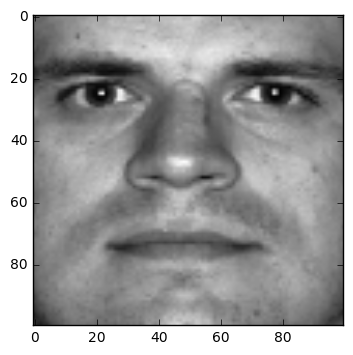

In [12]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = np.array(Image.open('/home/amrishkh/Desktop/FaceRecog/10_Class_Test/yaleB04/yaleB04_P00A+000E+00.png'))

##Wrong Prediction --> yale/B04/yaleB04_P00A+000E+90.png
print "WE ARE AWARE THAT THIS IMAGE BELONGS TO CLASS yaleB04, Lets Check what the model Predicts ??"
plt.imshow(img, cmap="Greys_r")

In [13]:
img_reshape = img.reshape(1,100,100,1)
z = model1.predict_classes(img_reshape)

li = ["Class YaleB01", "Class YaleB02", "Class YaleB03", "Class YaleB04", "Class YaleB05", "Class YaleB06", "Class YaleB07", "Class YaleB08", "Class YaleB09", "Class YaleB10" ]

print "The model predicts ", li[z]

1/1 [==============================] - 0s
The model predicts  Class YaleB04


/home/viswa/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


WE ARE AWARE THAT THIS IMAGE BELONGS TO CLASS yaleB04, Lets Check what the model Predicts ??


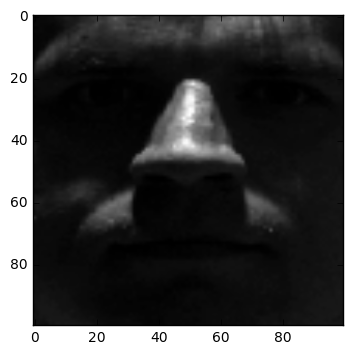

In [17]:
img = np.array(Image.open('/home/amrishkh/Desktop/FaceRecog/10_Class_Test/yaleB04/yaleB04_P00A+000E+90.png'))

print "WE ARE AWARE THAT THIS IMAGE BELONGS TO CLASS yaleB04, Lets Check what the model Predicts ??"
plt.imshow(img, cmap="Greys_r")

In [18]:
img_reshape = img.reshape(1,100,100,1)
z = model1.predict_classes(img_reshape)

li = ["Class YaleB01", "Class YaleB02", "Class YaleB03", "Class YaleB04", "Class YaleB05", "Class YaleB06", "Class YaleB07", "Class YaleB08", "Class YaleB09", "Class YaleB10" ]

print "The model predicts ", li[z]

1/1 [==============================] - 0s
The model predicts  Class YaleB04


/home/viswa/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
